In [113]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, BarycentricInterpolator, make_interp_spline, AAA


In [114]:
def cheb_errors(alpha):
    n_list = [100, 200, 500, 1000, 2000]
    cheb_geom_error_means = []
    if alpha == 0:
        invbeta = 0.5
    else:
        invbeta = 1 - alpha
    test_cheb_data = pd.read_csv(f'data/testing_data_{alpha}.csv')
    test_deltas = test_cheb_data.iloc[:, 0].to_numpy()
    test_rules = np.array(test_cheb_data.iloc[:, 1].apply(ast.literal_eval).to_list())

    test_cheb_data_nzero = pd.read_csv(f'data/testing_data_{alpha}_nzero.csv')
    test_deltas_nzero = test_cheb_data_nzero.iloc[:, 0].to_numpy()
    test_rules_nzero = np.array(test_cheb_data_nzero.iloc[:, 1].apply(ast.literal_eval).to_list())


    for n in n_list:
        cheb_training_data = pd.read_csv(f'data/cheb_training_data_{n}_{alpha}.csv')
        deltas = cheb_training_data.iloc[:, 0].to_numpy()
        rules = cheb_training_data.iloc[:, 1].apply(ast.literal_eval).to_numpy()
        rules_df = pd.DataFrame(rules.tolist(), columns=[f'rule_{i+1}' for i in range(6)])
        cheb_training_data = pd.concat([cheb_training_data, rules_df], axis=1)

        # Ensure all numpy arrays use float64 for maximum precision
        deltas = deltas.astype(np.float64)
        rules_df = rules_df.astype(np.float64)
        cheb_training_data = cheb_training_data.astype({f'rule_{i+1}': np.float64 for i in range(6)})

        # Approximate using AAA
        cheb_maps = [BarycentricInterpolator(deltas, cheb_training_data[f'rule_{i+1}'].to_numpy()) for i in range(6)]

        errors = []
        errors_nzero = []
        for i, delta in enumerate(test_deltas):
            mapped = [float(cheb_maps[j](delta ** invbeta)) for j in range(6)]
            errors.append(np.abs(mapped - test_rules[i]))

        for i, delta in enumerate(test_deltas_nzero):
            mapped_nzero = [float(cheb_maps[j](delta ** invbeta)) for j in range(6)]
            errors_nzero.append(np.abs(mapped_nzero - test_rules_nzero[i]))

        errors = np.linalg.norm(errors, axis=1)
        errors_nzero = np.linalg.norm(errors_nzero, axis=1)
        cheb_geom_error_means.append(np.exp(np.mean(np.log(errors))))
    # return errors, non-zero errors, and all geom means
    return errors, errors_nzero, cheb_geom_error_means

errors_025, errors_025_nzero, cheb_geom_errors_025 = cheb_errors(0.25)
errors_05, errors_05_nzero, cheb_geom_errors_05 = cheb_errors(0.5)
errors_075, errors_075_nzero, cheb_geom_errors_075 = cheb_errors(0.75)
errors_0, errors_0_nzero, cheb_geom_errors_0 = cheb_errors(0)
        

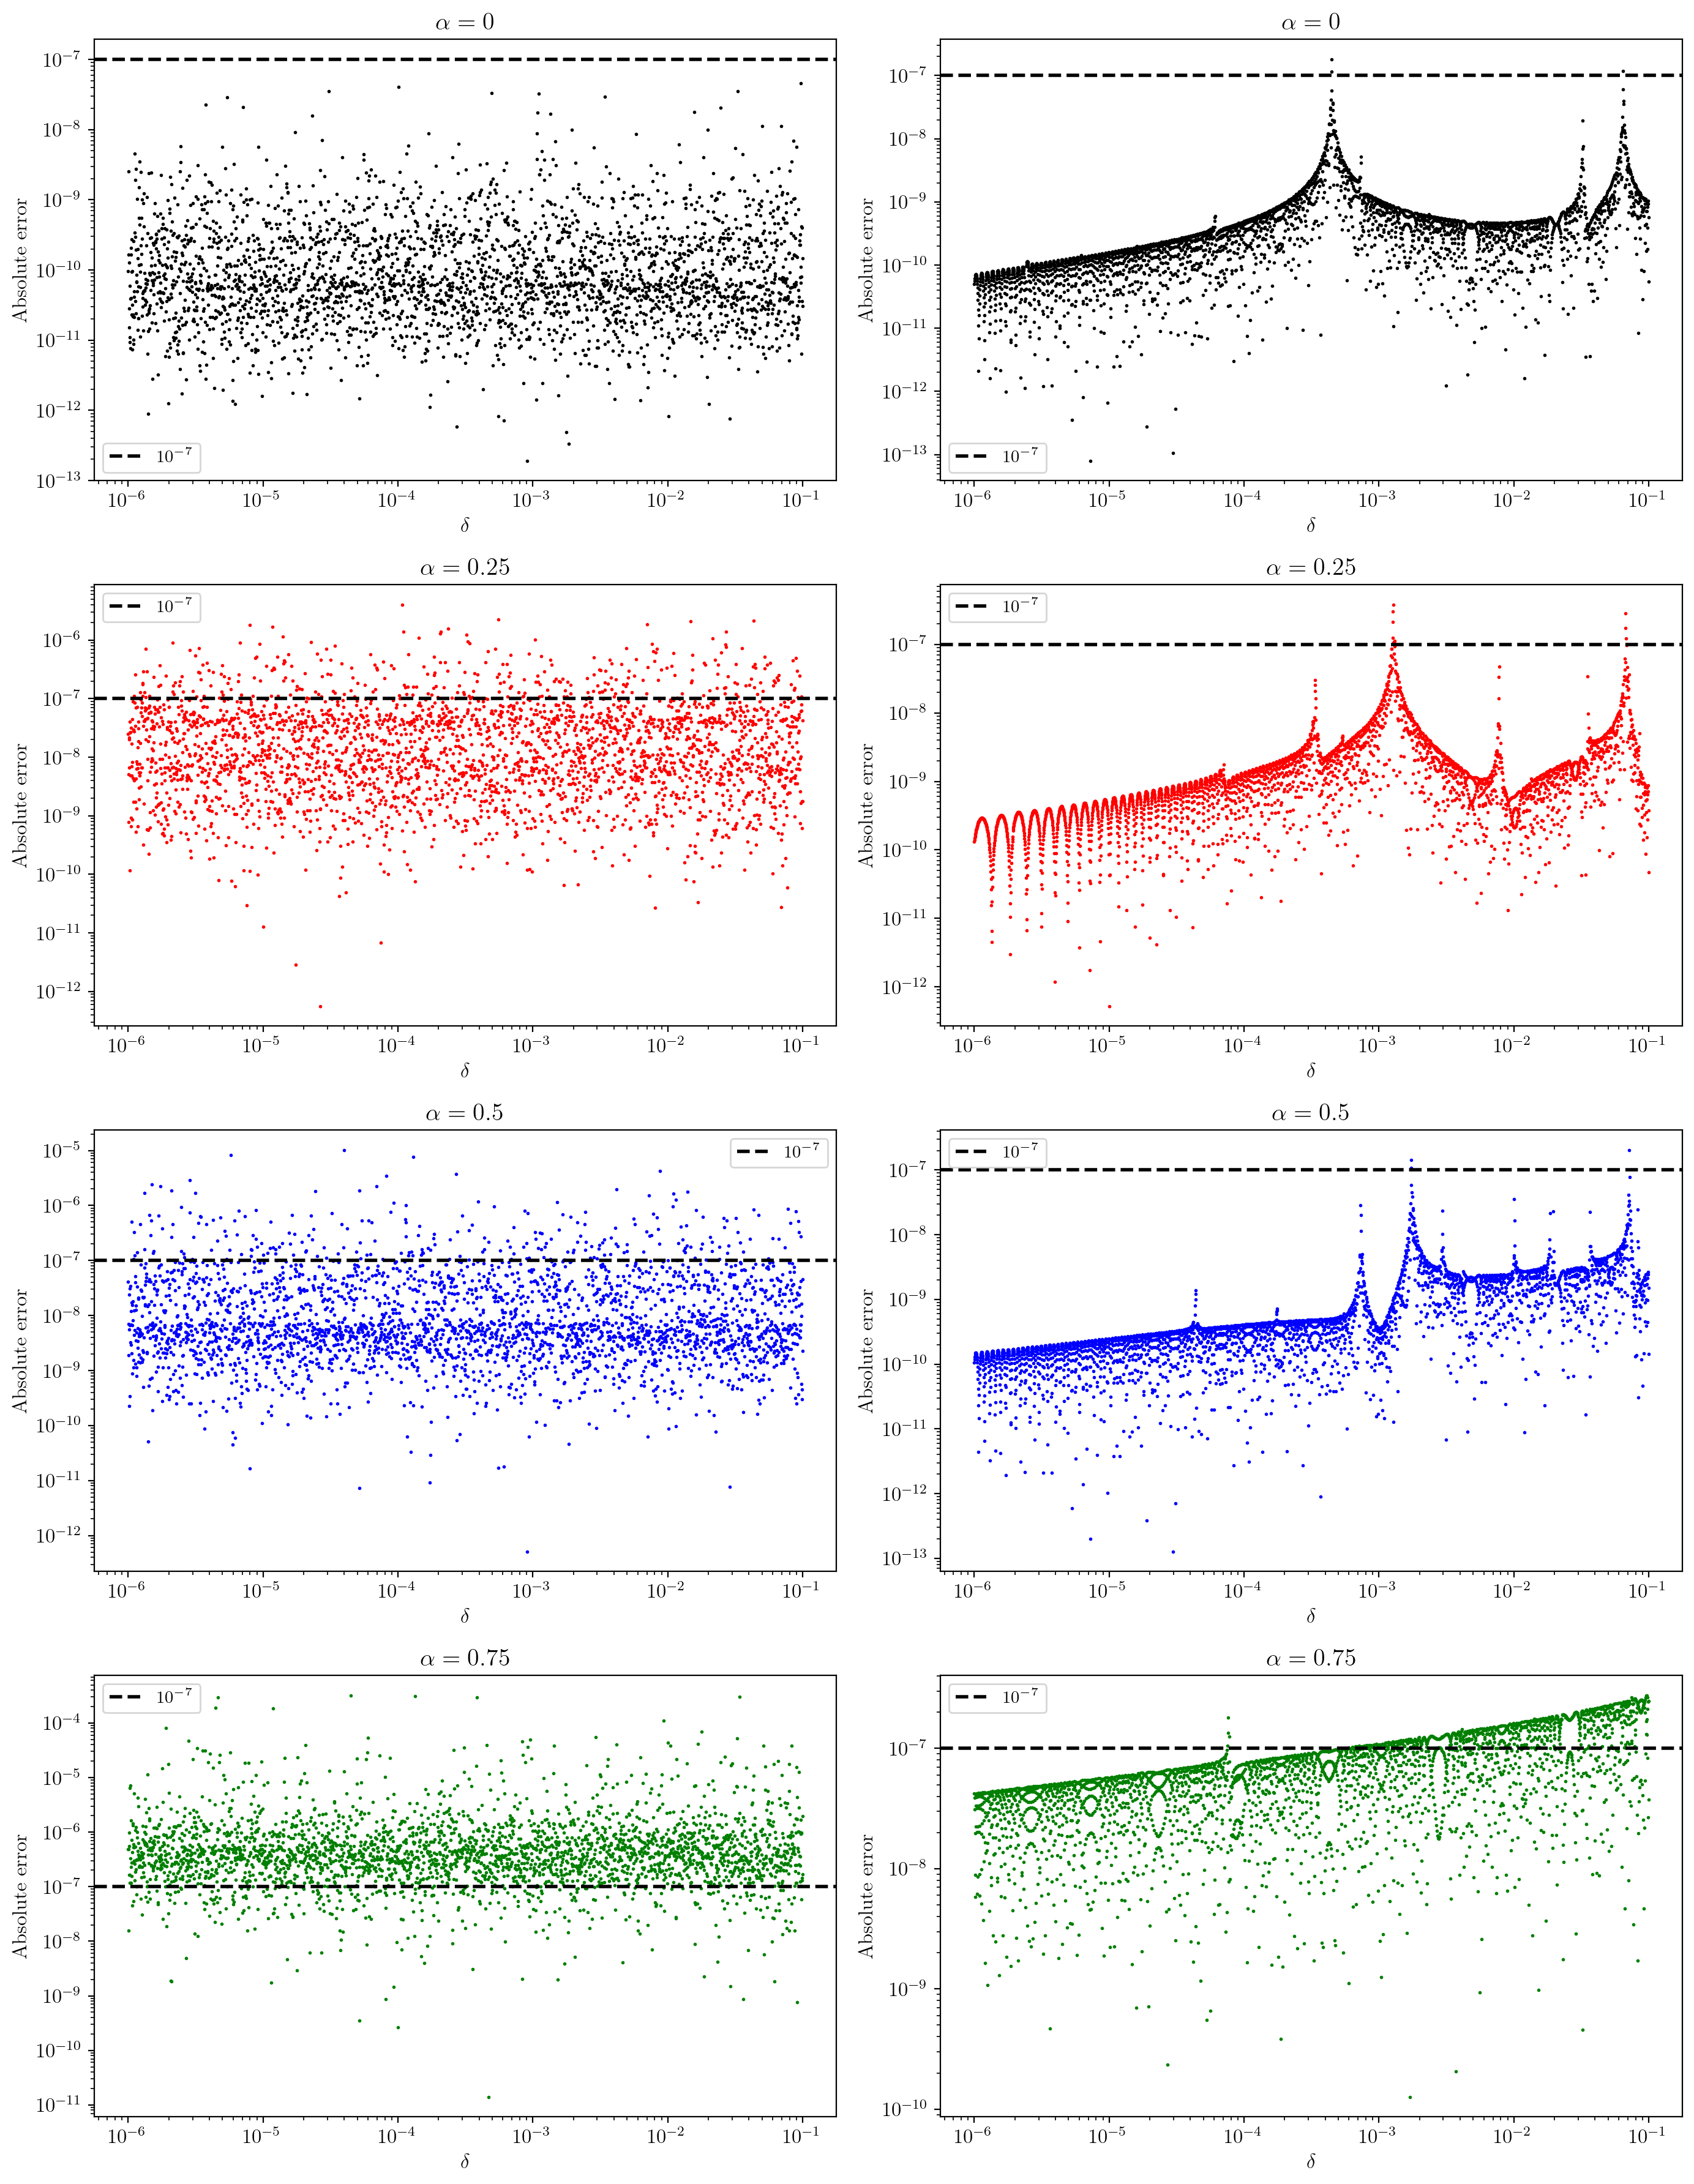

In [115]:
test_cheb_data = pd.read_csv(f'data/testing_data_0.75_nzero.csv') # all same deltas
test_deltas = test_cheb_data.iloc[:, 0].to_numpy()

fig, axs = plt.subplots(4, 2, figsize=(14, 18), dpi=200)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axs[0, 0].set_title(r'$\alpha = 0$')
axs[1, 0].set_title(r'$\alpha = 0.25$')
axs[2, 0].set_title(r'$\alpha = 0.5$')
axs[3, 0].set_title(r'$\alpha = 0.75$')

axs[0, 1].set_title(r'$\alpha = 0$')
axs[1, 1].set_title(r'$\alpha = 0.25$')
axs[2, 1].set_title(r'$\alpha = 0.5$')
axs[3, 1].set_title(r'$\alpha = 0.75$')

axs[0, 0].scatter(test_deltas, errors_0, s=1, color='black')
axs[0, 0].set_xlabel(r'$\delta$')
axs[0, 0].set_ylabel('Absolute error')
axs[0, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].legend(markerscale=5, fontsize='small')

axs[1, 0].scatter(test_deltas, errors_025, s=1, color='red')
axs[1, 0].set_xlabel(r'$\delta$')
axs[1, 0].set_ylabel('Absolute error')
axs[1, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].legend(markerscale=5, fontsize='small')

axs[2, 0].scatter(test_deltas, errors_05, s=1, color='blue')
axs[2, 0].set_xlabel(r'$\delta$')
axs[2, 0].set_ylabel('Absolute error')
axs[2, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 0].set_yscale('log')
axs[2, 0].set_xscale('log')
axs[2, 0].legend(markerscale=5, fontsize='small')

axs[3, 0].scatter(test_deltas, errors_075, s=1, color='green')
axs[3, 0].set_xlabel(r'$\delta$')
axs[3, 0].set_ylabel('Absolute error')
axs[3, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 0].set_yscale('log')
axs[3, 0].set_xscale('log')
axs[3, 0].legend(markerscale=5, fontsize='small')

axs[0, 1].scatter(test_deltas, errors_0_nzero, s=1, color='black')
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel('Absolute error')
axs[0, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].legend(markerscale=5, fontsize='small')

axs[1, 1].scatter(test_deltas, errors_025_nzero, s=1, color='red')
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel('Absolute error')
axs[1, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].legend(markerscale=5, fontsize='small')

axs[2, 1].scatter(test_deltas, errors_05_nzero, s=1, color='blue')
axs[2, 1].set_xlabel(r'$\delta$')
axs[2, 1].set_ylabel('Absolute error')
axs[2, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')
axs[2, 1].legend(markerscale=5, fontsize='small')

axs[3, 1].scatter(test_deltas, errors_075_nzero, s=1, color='green')
axs[3, 1].set_xlabel(r'$\delta$')
axs[3, 1].set_ylabel('Absolute error')
axs[3, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 1].set_yscale('log')
axs[3, 1].set_xscale('log')
axs[3, 1].legend(markerscale=5, fontsize='small')

plt.tight_layout()
plt.savefig('chebyshev_4x2_grid.png', bbox_inches='tight')



In [116]:
from tqdm import tqdm
def aaa_errors(alpha):
    n_list = [100, 200, 500, 1000, 2000]
    aaa_geom_error_means = []
    
    test_aaa_data = pd.read_csv(f'data/testing_data_{alpha}.csv')
    test_deltas = test_aaa_data.iloc[:, 0].to_numpy()
    test_rules = np.array(test_aaa_data.iloc[:, 1].apply(ast.literal_eval).to_list())

    test_aaa_data_nzero = pd.read_csv(f'data/testing_data_{alpha}_nzero.csv')
    test_deltas_nzero = test_aaa_data_nzero.iloc[:, 0].to_numpy()
    test_rules_nzero = np.array(test_aaa_data_nzero.iloc[:, 1].apply(ast.literal_eval).to_list())


    for n in tqdm(n_list):
        aaa_training_data = pd.read_csv(f'data/aaa_training_data_{n}_{alpha}.csv')
        deltas = aaa_training_data.iloc[:, 0].to_numpy()
        rules = aaa_training_data.iloc[:, 1].apply(ast.literal_eval).to_numpy()
        rules_df = pd.DataFrame(rules.tolist(), columns=[f'rule_{i+1}' for i in range(6)])
        aaa_training_data = pd.concat([aaa_training_data, rules_df], axis=1)

        # Ensure all numpy arrays use float64 for maximum precision
        deltas = deltas.astype(np.float64)
        rules_df = rules_df.astype(np.float64)
        aaa_training_data = aaa_training_data.astype({f'rule_{i+1}': np.float64 for i in range(6)})

        # Approximate using AAA
        aaa_maps = [AAA(deltas, aaa_training_data[f'rule_{i+1}'].to_numpy(), max_terms=500) for i in range(6)]

        errors = []
        errors_nzero = []
        for i, delta in enumerate(test_deltas):
            mapped = [float(aaa_maps[j](delta)) for j in range(6)]
            errors.append(np.abs(mapped - test_rules[i]))

        for i, delta in enumerate(test_deltas_nzero):
            mapped_nzero = [float(aaa_maps[j](delta)) for j in range(6)]
            errors_nzero.append(np.abs(mapped_nzero - test_rules_nzero[i]))

        errors = np.linalg.norm(errors, axis=1)
        errors_nzero = np.linalg.norm(errors_nzero, axis=1)
        aaa_geom_error_means.append(np.exp(np.mean(np.log(errors))))
    # return errors, non-zero errors, and all geom means
    return errors, errors_nzero, aaa_geom_error_means

aaa_errors_025, aaa_errors_025_nzero, aaa_geom_errors_025 = aaa_errors(0.25)
aaa_errors_05, aaa_errors_05_nzero, aaa_geom_errors_05 = aaa_errors(0.5)
aaa_errors_075, aaa_errors_075_nzero, aaa_geom_errors_075 = aaa_errors(0.75)
aaa_errors_0, aaa_errors_0_nzero, aaa_geom_errors_0 = aaa_errors(0)


 40%|████      | 2/5 [00:01<00:01,  1.61it/s]/opt/anaconda3/lib/python3.12/site-packages/scipy/interpolate/_bary_rational.py:417: RuntimeWarning: 1 Froissart doublets detected.
  self.clean_up(clean_up_tol)
 60%|██████    | 3/5 [00:10<00:09,  4.68s/it]/opt/anaconda3/lib/python3.12/site-packages/scipy/interpolate/_bary_rational.py:57: RuntimeWarning: AAA failed to converge within 500 iterations.
  self._compute_weights(z, f, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/scipy/interpolate/_bary_rational.py:417: RuntimeWarning: 1 Froissart doublets detected.
  self.clean_up(clean_up_tol)
 80%|████████  | 4/5 [01:29<00:33, 33.91s/it]/opt/anaconda3/lib/python3.12/site-packages/scipy/interpolate/_bary_rational.py:57: RuntimeWarning: AAA failed to converge within 500 iterations.
  self._compute_weights(z, f, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/scipy/interpolate/_bary_rational.py:417: RuntimeWarning: 1 Froissart doublets detected.
  self.clean_up(clean_up_tol)
 40%|██

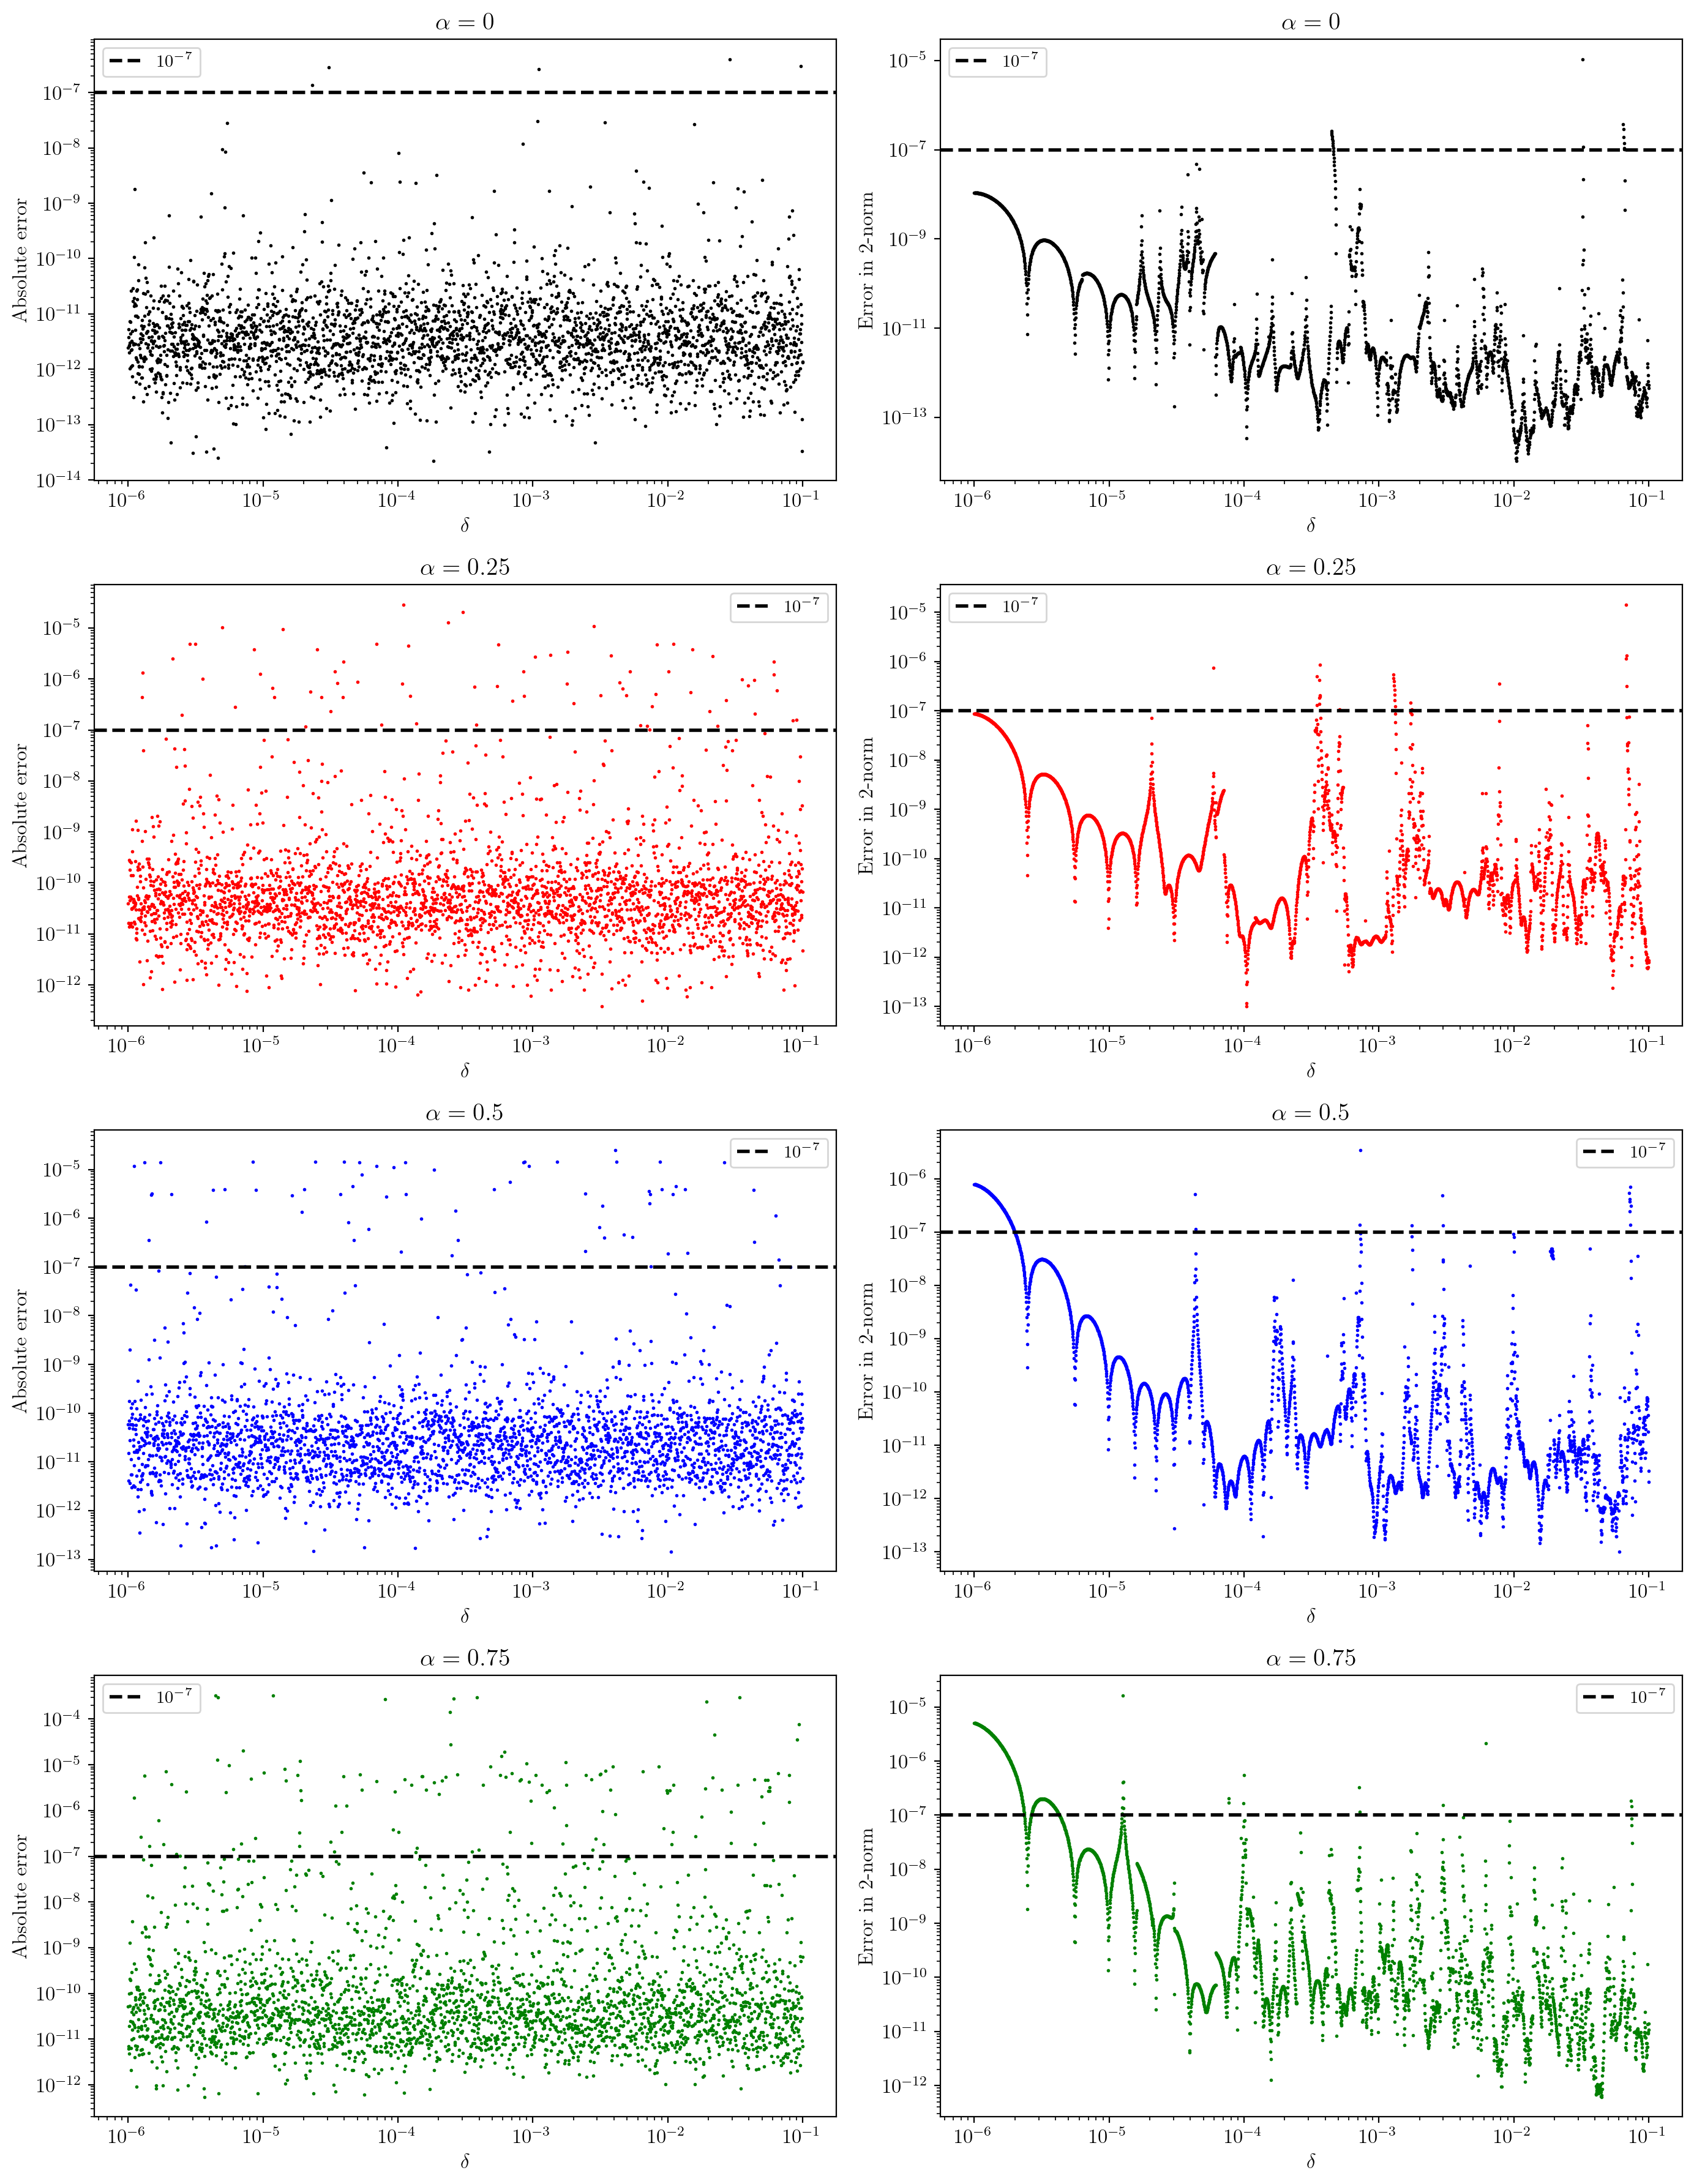

In [117]:
test_aaa_data = pd.read_csv(f'data/testing_data_0.75_nzero.csv') # all same
test_deltas = test_aaa_data.iloc[:, 0].to_numpy()
fig, axs = plt.subplots(4, 2, figsize=(14, 18), dpi=200)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axs[0, 0].set_title(r'$\alpha = 0$')
axs[1, 0].set_title(r'$\alpha = 0.25$')
axs[2, 0].set_title(r'$\alpha = 0.5$')
axs[3, 0].set_title(r'$\alpha = 0.75$')

axs[0, 1].set_title(r'$\alpha = 0$')
axs[1, 1].set_title(r'$\alpha = 0.25$')
axs[2, 1].set_title(r'$\alpha = 0.5$')
axs[3, 1].set_title(r'$\alpha = 0.75$')

axs[0, 0].scatter(test_deltas, aaa_errors_0, s=1, color='black')
axs[0, 0].set_xlabel(r'$\delta$')
axs[0, 0].set_ylabel('Absolute error')
axs[0, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].legend(markerscale=5, fontsize='small')

axs[1, 0].scatter(test_deltas, aaa_errors_025, s=1, color='red')
axs[1, 0].set_xlabel(r'$\delta$')
axs[1, 0].set_ylabel('Absolute error')
axs[1, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].legend(markerscale=5, fontsize='small')

axs[2, 0].scatter(test_deltas, aaa_errors_05, s=1, color='blue')
axs[2, 0].set_xlabel(r'$\delta$')
axs[2, 0].set_ylabel('Absolute error')
axs[2, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 0].set_yscale('log')
axs[2, 0].set_xscale('log')
axs[2, 0].legend(markerscale=5, fontsize='small')

axs[3, 0].scatter(test_deltas, aaa_errors_075, s=1, color='green')
axs[3, 0].set_xlabel(r'$\delta$')
axs[3, 0].set_ylabel('Absolute error')
axs[3, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 0].set_yscale('log')
axs[3, 0].set_xscale('log')
axs[3, 0].legend(markerscale=5, fontsize='small')

axs[0, 1].scatter(test_deltas, aaa_errors_0_nzero, s=1, color='black')
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel('Error in 2-norm')
axs[0, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].legend(markerscale=5, fontsize='small')

axs[1, 1].scatter(test_deltas, aaa_errors_025_nzero, s=1, color='red')
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel('Error in 2-norm')
axs[1, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].legend(markerscale=5, fontsize='small')

axs[2, 1].scatter(test_deltas, aaa_errors_05_nzero, s=1, color='blue')
axs[2, 1].set_xlabel(r'$\delta$')
axs[2, 1].set_ylabel('Error in 2-norm')
axs[2, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')
axs[2, 1].legend(markerscale=5, fontsize='small')

axs[3, 1].scatter(test_deltas, aaa_errors_075_nzero, s=1, color='green')
axs[3, 1].set_xlabel(r'$\delta$')
axs[3, 1].set_ylabel('Error in 2-norm')
axs[3, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 1].set_yscale('log')
axs[3, 1].set_xscale('log')
axs[3, 1].legend(markerscale=5, fontsize='small')

plt.tight_layout()
plt.savefig('aaa_4x2_grid.png', bbox_inches='tight')
plt.show()

In [118]:
test_aaa_data = pd.read_csv(f'data/testing_data_0.75_nzero.csv') # all same deltas
test_deltas = test_cheb_data.iloc[:, 0].to_numpy()
plt.figure(figsize=(9, 6), dpi=200)

axs[0, 0].set_title(r'$\alpha = 0$')
axs[1, 0].set_title(r'$\alpha = 0.25$')
axs[2, 0].set_title(r'$\alpha = 0.5$')
axs[3, 0].set_title(r'$\alpha = 0.75$')

axs[0, 1].set_title(r'$\alpha = 0$')
axs[1, 1].set_title(r'$\alpha = 0.25$')
axs[2, 1].set_title(r'$\alpha = 0.5$')
axs[3, 1].set_title(r'$\alpha = 0.75$')

axs[0, 0].scatter(test_deltas, errors_0, s=1, color='black')
axs[0, 0].set_xlabel(r'$\delta$')
axs[0, 0].set_ylabel('Absolute error')
axs[0, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].legend(markerscale=5, fontsize='small')

axs[1, 0].scatter(test_deltas, errors_025, s=1, color='red')
axs[1, 0].set_xlabel(r'$\delta$')
axs[1, 0].set_ylabel('Absolute error')
axs[1, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].legend(markerscale=5, fontsize='small')

axs[2, 0].scatter(test_deltas, errors_05, s=1, color='blue')
axs[2, 0].set_xlabel(r'$\delta$')
axs[2, 0].set_ylabel('Absolute error')
axs[2, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 0].set_yscale('log')
axs[2, 0].set_xscale('log')
axs[2, 0].legend(markerscale=5, fontsize='small')

axs[3, 0].scatter(test_deltas, errors_075, s=1, color='green')
axs[3, 0].set_xlabel(r'$\delta$')
axs[3, 0].set_ylabel('Absolute error')
axs[3, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 0].set_yscale('log')
axs[3, 0].set_xscale('log')
axs[3, 0].legend(markerscale=5, fontsize='small')

axs[0, 1].scatter(test_deltas, errors_0_nzero, s=1, color='black')
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel('Absolute error')
axs[0, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].legend(markerscale=5, fontsize='small')

axs[1, 1].scatter(test_deltas, errors_025_nzero, s=1, color='red')
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel('Absolute error')
axs[1, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].legend(markerscale=5, fontsize='small')

axs[2, 1].scatter(test_deltas, errors_05_nzero, s=1, color='blue')
axs[2, 1].set_xlabel(r'$\delta$')
axs[2, 1].set_ylabel('Absolute error')
axs[2, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')
axs[2, 1].legend(markerscale=5, fontsize='small')

axs[3, 1].scatter(test_deltas, errors_075_nzero, s=1, color='green')
axs[3, 1].set_xlabel(r'$\delta$')
axs[3, 1].set_ylabel('Absolute error')
axs[3, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 1].set_yscale('log')
axs[3, 1].set_xscale('log')
axs[3, 1].legend(markerscale=5, fontsize='small')

plt.tight_layout()
plt.savefig('aaa_4x2_grid.png', bbox_inches='tight')
plt.show()

<Figure size 1800x1200 with 0 Axes>

In [120]:
def cheb_uniform_errors(alpha):
    n_list = [100, 200, 500, 1000, 2000]
    cu_geom_error_means = []
    
    test_cu_data = pd.read_csv(f'data/testing_data_{alpha}.csv')
    test_deltas = test_cu_data.iloc[:, 0].to_numpy()
    test_rules = np.array(test_cu_data.iloc[:, 1].apply(ast.literal_eval).to_list())

    test_cu_data_nzero = pd.read_csv(f'data/testing_data_{alpha}_nzero.csv')
    test_deltas_nzero = test_cu_data_nzero.iloc[:, 0].to_numpy()
    test_rules_nzero = np.array(test_cu_data_nzero.iloc[:, 1].apply(ast.literal_eval).to_list())


    for n in n_list:
        cu_training_data = pd.read_csv(f'data/aaa_training_data_{n}_{alpha}.csv')
        deltas = cu_training_data.iloc[:, 0].to_numpy()
        rules = cu_training_data.iloc[:, 1].apply(ast.literal_eval).to_numpy()
        rules_df = pd.DataFrame(rules.tolist(), columns=[f'rule_{i+1}' for i in range(6)])
        cu_training_data = pd.concat([cu_training_data, rules_df], axis=1)

        # Ensure all numpy arrays use float64 for maximum precision
        deltas = deltas.astype(np.float64)
        rules_df = rules_df.astype(np.float64)
        cu_training_data = cu_training_data.astype({f'rule_{i+1}': np.float64 for i in range(6)})

        # Approximate using cu
        cu_maps = [BarycentricInterpolator(deltas, cu_training_data[f'rule_{i+1}'].to_numpy()) for i in range(6)]

        errors = []
        errors_nzero = []
        for i, delta in enumerate(test_deltas):
            mapped = [float(cu_maps[j](delta)) for j in range(6)]
            errors.append(np.abs(mapped - test_rules[i]))

        for i, delta in enumerate(test_deltas_nzero):
            mapped_nzero = [float(cu_maps[j](delta)) for j in range(6)]
            errors_nzero.append(np.abs(mapped_nzero - test_rules_nzero[i]))

        errors = np.linalg.norm(errors, axis=1)
        errors_nzero = np.linalg.norm(errors_nzero, axis=1)
        cu_geom_error_means.append(np.exp(np.mean(np.log(errors))))
    # return errors, non-zero errors, and all geom means
    return errors, errors_nzero, cu_geom_error_means

cu_errors_025, cu_errors_025_nzero, cu_geom_errors_025 = cheb_uniform_errors(0.25)
cu_errors_05, cu_errors_05_nzero, cu_geom_errors_05 = cheb_uniform_errors(0.5)
cu_errors_075, cu_errors_075_nzero, cu_geom_errors_075 = cheb_uniform_errors(0.75)
cu_errors_0, cu_errors_0_nzero, cu_geom_errors_0 = cheb_uniform_errors(0)

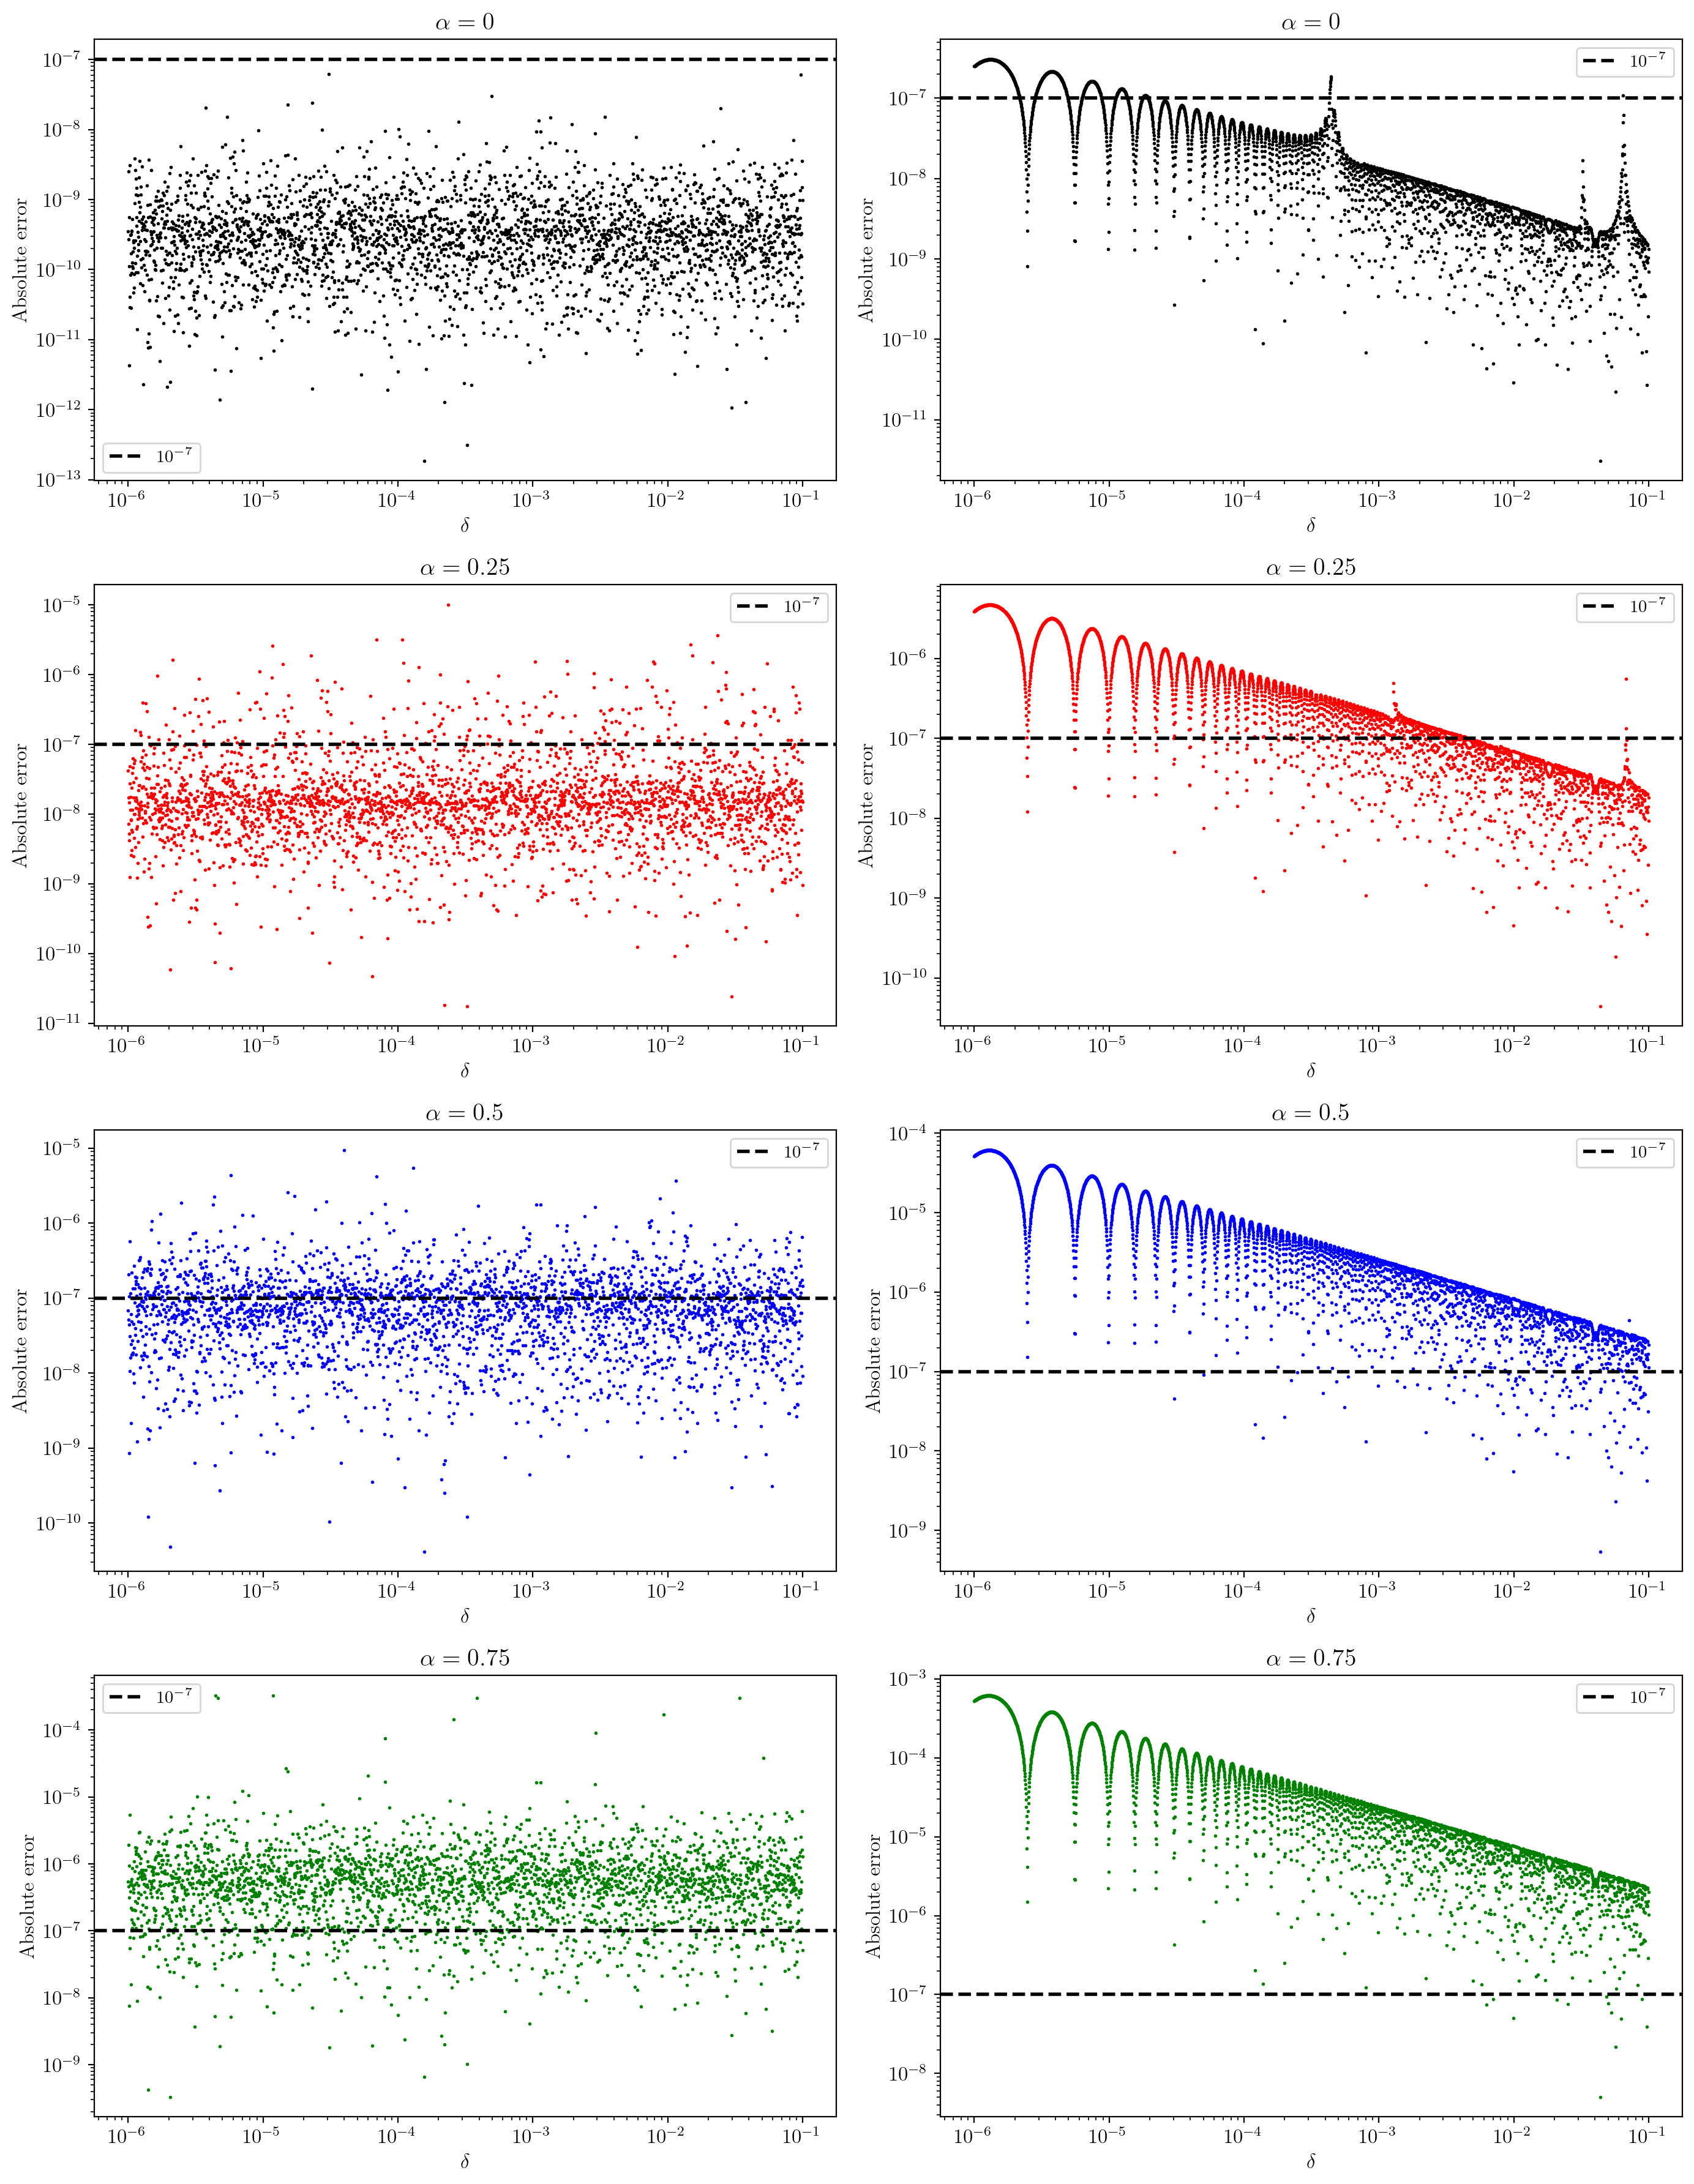

In [121]:
test_cu_data = pd.read_csv(f'data/testing_data_0.75_nzero.csv') # all same deltas
test_deltas = test_cu_data.iloc[:, 0].to_numpy()
fig, axs = plt.subplots(4, 2, figsize=(14, 18), dpi=200)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axs[0, 0].set_title(r'$\alpha = 0$')
axs[1, 0].set_title(r'$\alpha = 0.25$')
axs[2, 0].set_title(r'$\alpha = 0.5$')
axs[3, 0].set_title(r'$\alpha = 0.75$')

axs[0, 1].set_title(r'$\alpha = 0$')
axs[1, 1].set_title(r'$\alpha = 0.25$')
axs[2, 1].set_title(r'$\alpha = 0.5$')
axs[3, 1].set_title(r'$\alpha = 0.75$')

axs[0, 0].scatter(test_deltas, cu_errors_0, s=1, color='black')
axs[0, 0].set_xlabel(r'$\delta$')
axs[0, 0].set_ylabel('Absolute error')
axs[0, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].legend(markerscale=5, fontsize='small')

axs[1, 0].scatter(test_deltas, cu_errors_025, s=1, color='red')
axs[1, 0].set_xlabel(r'$\delta$')
axs[1, 0].set_ylabel('Absolute error')
axs[1, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].legend(markerscale=5, fontsize='small')

axs[2, 0].scatter(test_deltas, cu_errors_05, s=1, color='blue')
axs[2, 0].set_xlabel(r'$\delta$')
axs[2, 0].set_ylabel('Absolute error')
axs[2, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 0].set_yscale('log')
axs[2, 0].set_xscale('log')
axs[2, 0].legend(markerscale=5, fontsize='small')

axs[3, 0].scatter(test_deltas, cu_errors_075, s=1, color='green')
axs[3, 0].set_xlabel(r'$\delta$')
axs[3, 0].set_ylabel('Absolute error')
axs[3, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 0].set_yscale('log')
axs[3, 0].set_xscale('log')
axs[3, 0].legend(markerscale=5, fontsize='small')

axs[0, 1].scatter(test_deltas, cu_errors_0_nzero, s=1, color='black')
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel('Absolute error')
axs[0, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].legend(markerscale=5, fontsize='small')

axs[1, 1].scatter(test_deltas, cu_errors_025_nzero, s=1, color='red')
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel('Absolute error')
axs[1, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].legend(markerscale=5, fontsize='small')

axs[2, 1].scatter(test_deltas, cu_errors_05_nzero, s=1, color='blue')
axs[2, 1].set_xlabel(r'$\delta$')
axs[2, 1].set_ylabel('Absolute error')
axs[2, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')
axs[2, 1].legend(markerscale=5, fontsize='small')

axs[3, 1].scatter(test_deltas, cu_errors_075_nzero, s=1, color='green')
axs[3, 1].set_xlabel(r'$\delta$')
axs[3, 1].set_ylabel('Absolute error')
axs[3, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 1].set_yscale('log')
axs[3, 1].set_xscale('log')
axs[3, 1].legend(markerscale=5, fontsize='small')

plt.tight_layout()
plt.savefig('cu_4x2_grid.png', bbox_inches='tight')
plt.show()

In [122]:
from scipy.interpolate import make_interp_spline

def spline_errors(alpha):
    if alpha == 0:
        invbeta = 0.5
    else:
        invbeta = 1 - alpha
    n_list = [100, 200, 500, 1000, 2000]
    spline_geom_error_means = []
    
    test_spline_data = pd.read_csv(f'data/testing_data_{alpha}.csv')
    test_deltas = test_spline_data.iloc[:, 0].to_numpy()
    test_rules = np.array(test_spline_data.iloc[:, 1].apply(ast.literal_eval).to_list())

    test_spline_data_nzero = pd.read_csv(f'data/testing_data_{alpha}_nzero.csv')
    test_deltas_nzero = test_spline_data_nzero.iloc[:, 0].to_numpy()
    test_rules_nzero = np.array(test_spline_data_nzero.iloc[:, 1].apply(ast.literal_eval).to_list())


    for n in n_list:
        spline_training_data = pd.read_csv(f'data/cheb_training_data_{n}_{alpha}.csv')
        deltas = spline_training_data.iloc[:, 0].to_numpy()
        rules = spline_training_data.iloc[:, 1].apply(ast.literal_eval).to_numpy()
        rules_df = pd.DataFrame(rules.tolist(), columns=[f'rule_{i+1}' for i in range(6)])
        spline_training_data = pd.concat([spline_training_data, rules_df], axis=1)

        # Ensure all numpy arrays use float64 for maximum precision
        deltas = deltas.astype(np.float64)
        rules_df = rules_df.astype(np.float64)
        spline_training_data = spline_training_data.astype({f'rule_{i+1}': np.float64 for i in range(6)})

        # Approximate using spline
        spline_maps = [make_interp_spline(deltas, spline_training_data[f'rule_{i+1}'].to_numpy(), k=3, bc_type='not-a-knot') for i in range(6)]

        errors = []
        errors_nzero = []
        for i, delta in enumerate(test_deltas):
            mapped = [float(spline_maps[j](delta**invbeta)) for j in range(6)]
            errors.append(np.abs(mapped - test_rules[i]))

        for i, delta in enumerate(test_deltas_nzero):
            mapped_nzero = [float(spline_maps[j](delta**invbeta)) for j in range(6)]
            errors_nzero.append(np.abs(mapped_nzero - test_rules_nzero[i]))

        errors = np.linalg.norm(errors, axis=1)
        errors_nzero = np.linalg.norm(errors_nzero, axis=1)
        spline_geom_error_means.append(np.exp(np.mean(np.log(errors))))
        
    # return errors, non-zero errors, and all geom means
    return errors, errors_nzero, spline_geom_error_means

spline_errors_025, spline_errors_025_nzero, spline_geom_errors_025 = spline_errors(0.25)
spline_errors_05, spline_errors_05_nzero, spline_geom_errors_05 = spline_errors(0.5)
spline_errors_075, spline_errors_075_nzero, spline_geom_errors_075 = spline_errors(0.75)
spline_errors_0, spline_errors_0_nzero, spline_geom_errors_0 = spline_errors(0)

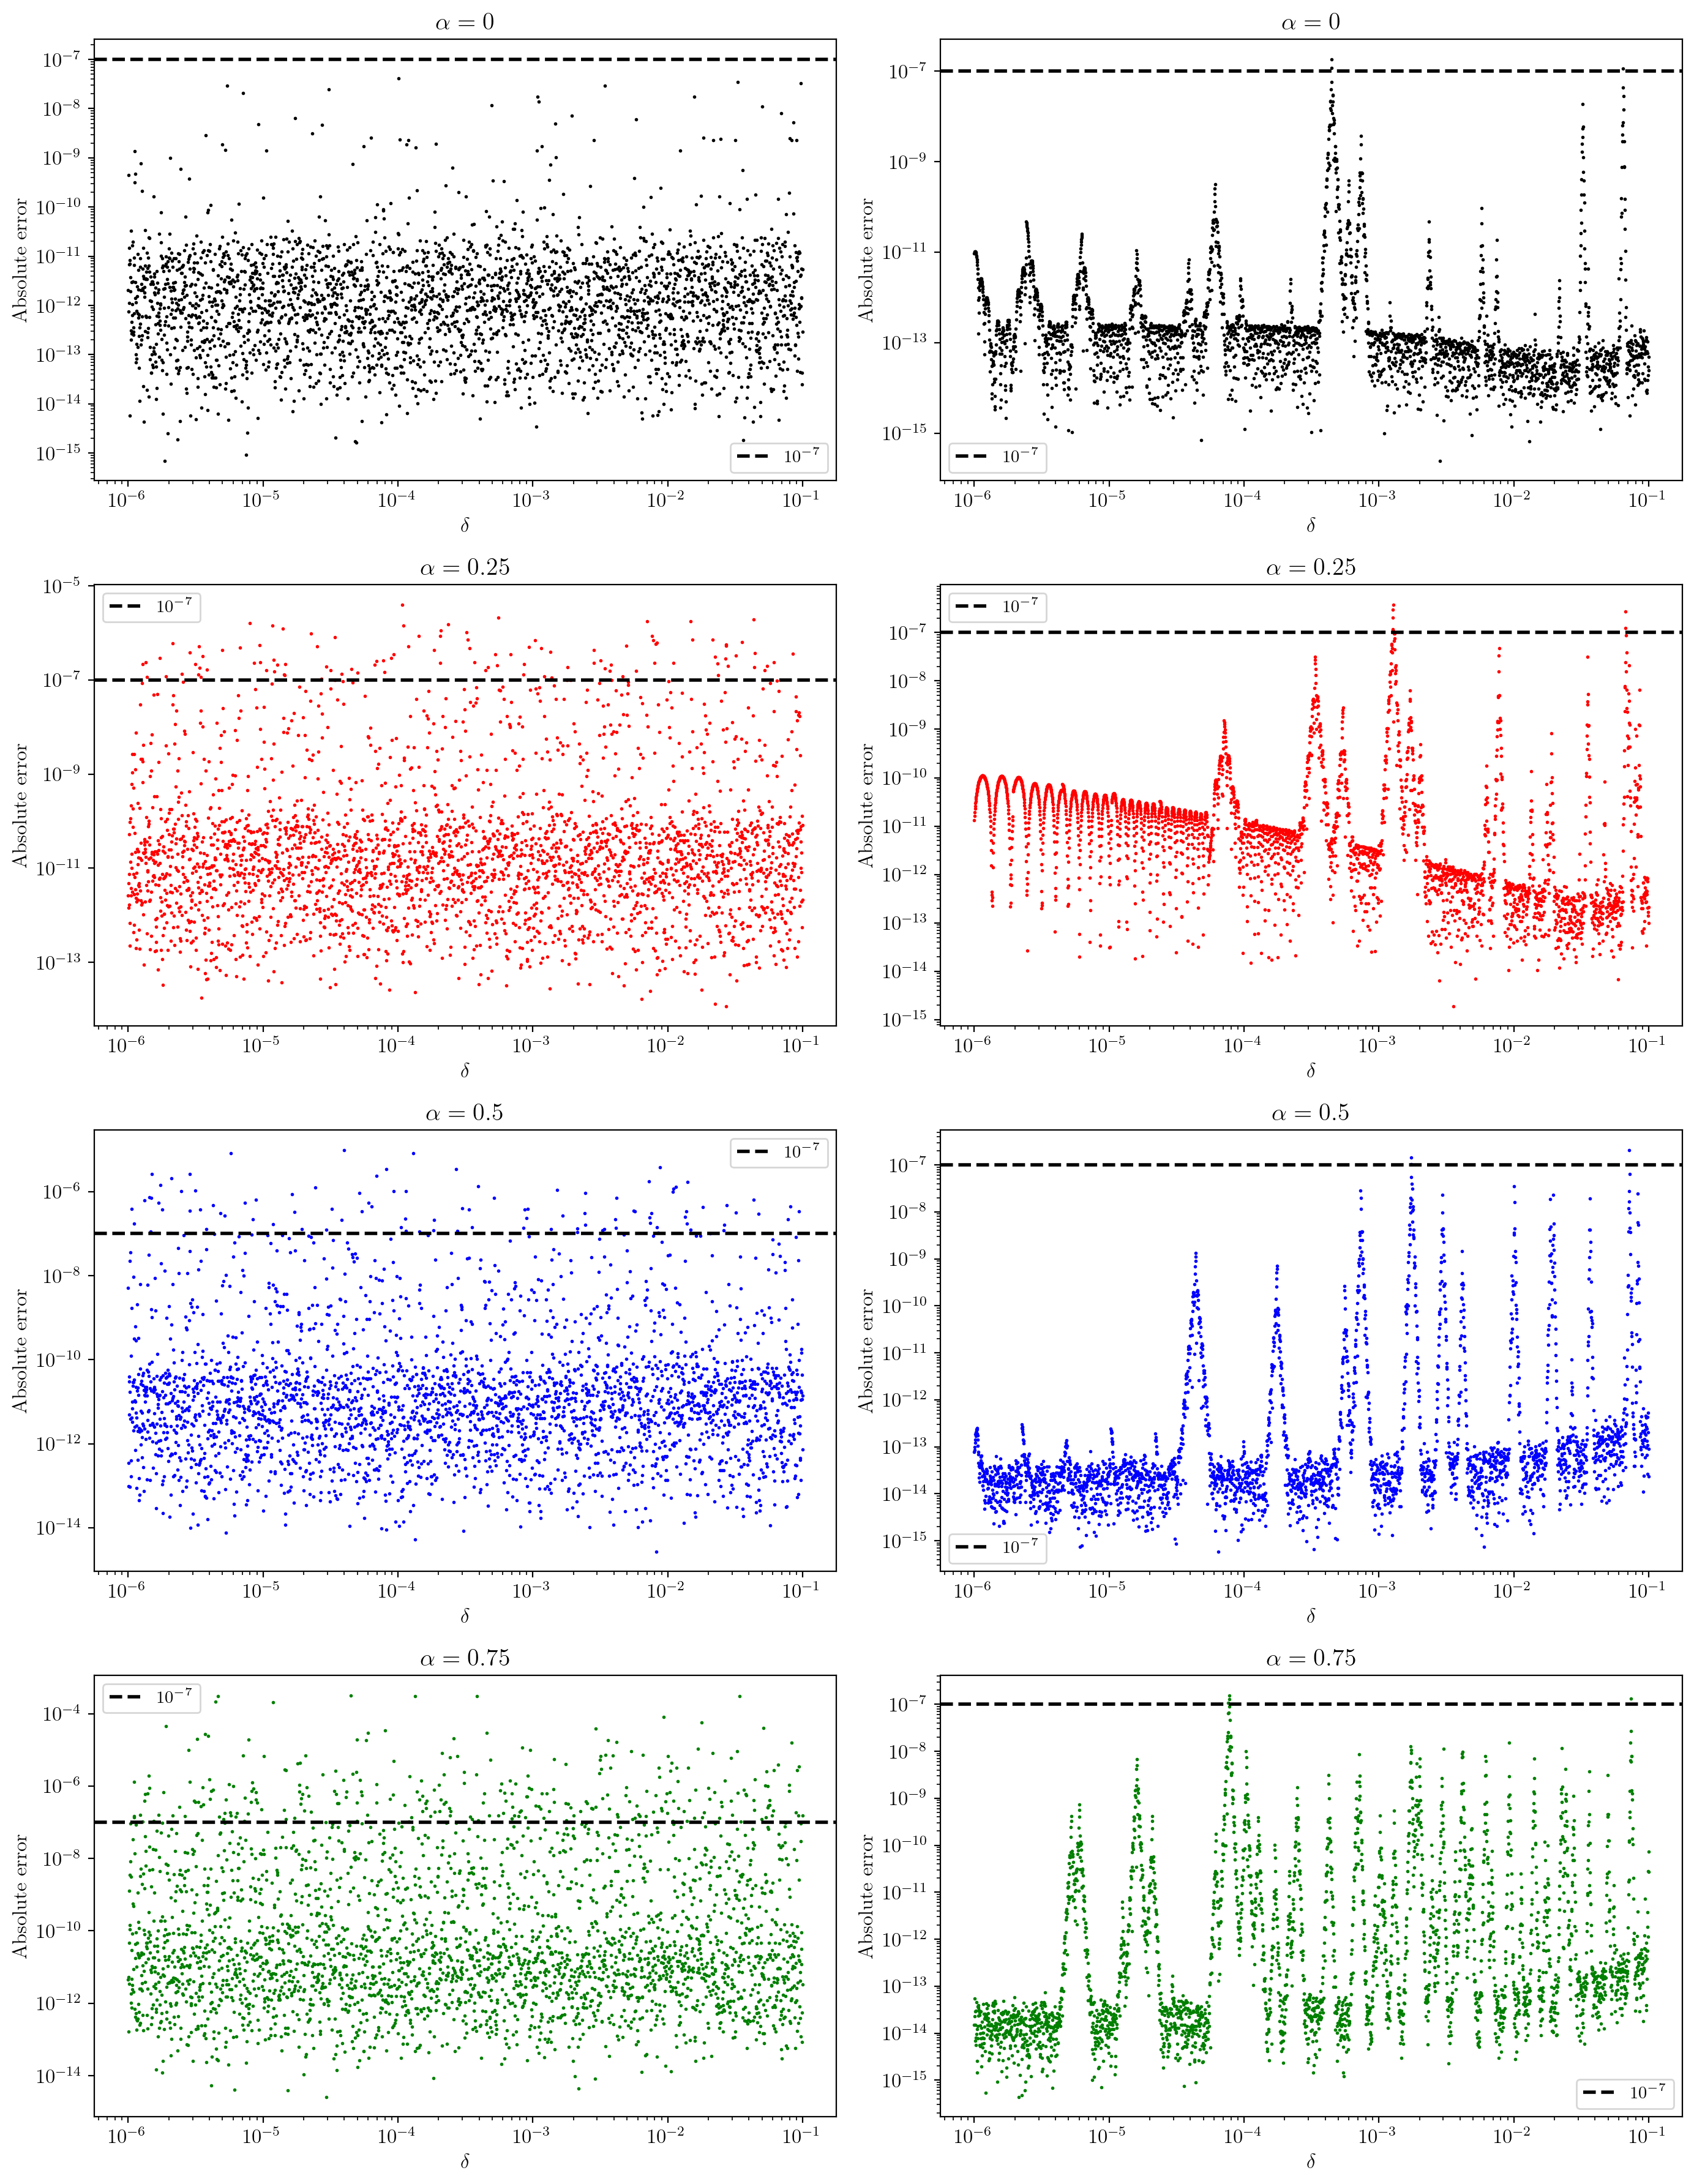

In [123]:
test_spline_data = pd.read_csv(f'data/testing_data_0.75_nzero.csv') # all same deltas
test_deltas = test_spline_data.iloc[:, 0].to_numpy()
fig, axs = plt.subplots(4, 2, figsize=(14, 18), dpi=200)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axs[0, 0].set_title(r'$\alpha = 0$')
axs[1, 0].set_title(r'$\alpha = 0.25$')
axs[2, 0].set_title(r'$\alpha = 0.5$')
axs[3, 0].set_title(r'$\alpha = 0.75$')

axs[0, 1].set_title(r'$\alpha = 0$')
axs[1, 1].set_title(r'$\alpha = 0.25$')
axs[2, 1].set_title(r'$\alpha = 0.5$')
axs[3, 1].set_title(r'$\alpha = 0.75$')

axs[0, 0].scatter(test_deltas, spline_errors_0, s=1, color='black')
axs[0, 0].set_xlabel(r'$\delta$')
axs[0, 0].set_ylabel('Absolute error')
axs[0, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].legend(markerscale=5, fontsize='small')

axs[1, 0].scatter(test_deltas, spline_errors_025, s=1, color='red')
axs[1, 0].set_xlabel(r'$\delta$')
axs[1, 0].set_ylabel('Absolute error')
axs[1, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].legend(markerscale=5, fontsize='small')

axs[2, 0].scatter(test_deltas, spline_errors_05, s=1, color='blue')
axs[2, 0].set_xlabel(r'$\delta$')
axs[2, 0].set_ylabel('Absolute error')
axs[2, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 0].set_yscale('log')
axs[2, 0].set_xscale('log')
axs[2, 0].legend(markerscale=5, fontsize='small')

axs[3, 0].scatter(test_deltas, spline_errors_075, s=1, color='green')
axs[3, 0].set_xlabel(r'$\delta$')
axs[3, 0].set_ylabel('Absolute error')
axs[3, 0].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 0].set_yscale('log')
axs[3, 0].set_xscale('log')
axs[3, 0].legend(markerscale=5, fontsize='small')

axs[0, 1].scatter(test_deltas, spline_errors_0_nzero, s=1, color='black')
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel('Absolute error')
axs[0, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].legend(markerscale=5, fontsize='small')

axs[1, 1].scatter(test_deltas, spline_errors_025_nzero, s=1, color='red')
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel('Absolute error')
axs[1, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].legend(markerscale=5, fontsize='small')

axs[2, 1].scatter(test_deltas, spline_errors_05_nzero, s=1, color='blue')
axs[2, 1].set_xlabel(r'$\delta$')
axs[2, 1].set_ylabel('Absolute error')
axs[2, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')
axs[2, 1].legend(markerscale=5, fontsize='small')

axs[3, 1].scatter(test_deltas, spline_errors_075_nzero, s=1, color='green')
axs[3, 1].set_xlabel(r'$\delta$')
axs[3, 1].set_ylabel('Absolute error')
axs[3, 1].axhline(1e-7, color='black', linestyle='--', linewidth=2, label=r'$10^{-7}$')
axs[3, 1].set_yscale('log')
axs[3, 1].set_xscale('log')
axs[3, 1].legend(markerscale=5, fontsize='small')

plt.tight_layout()
plt.savefig('spline_4x2_grid.png', bbox_inches='tight')
plt.show()


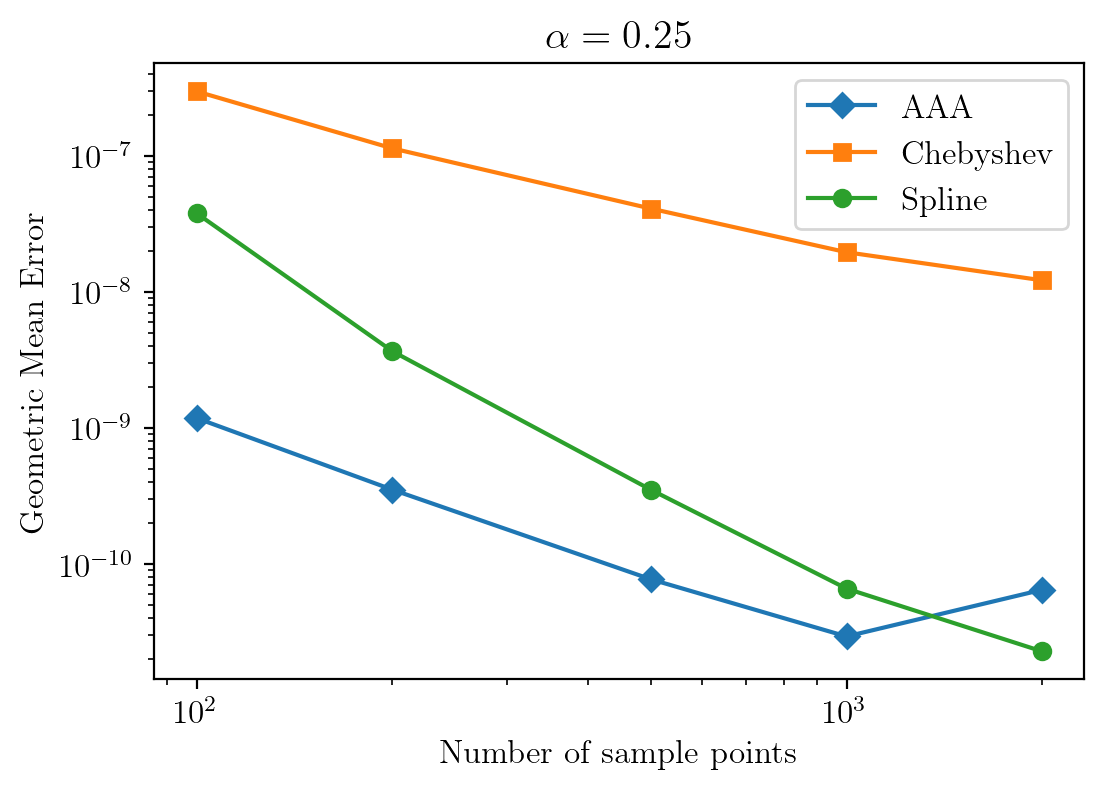

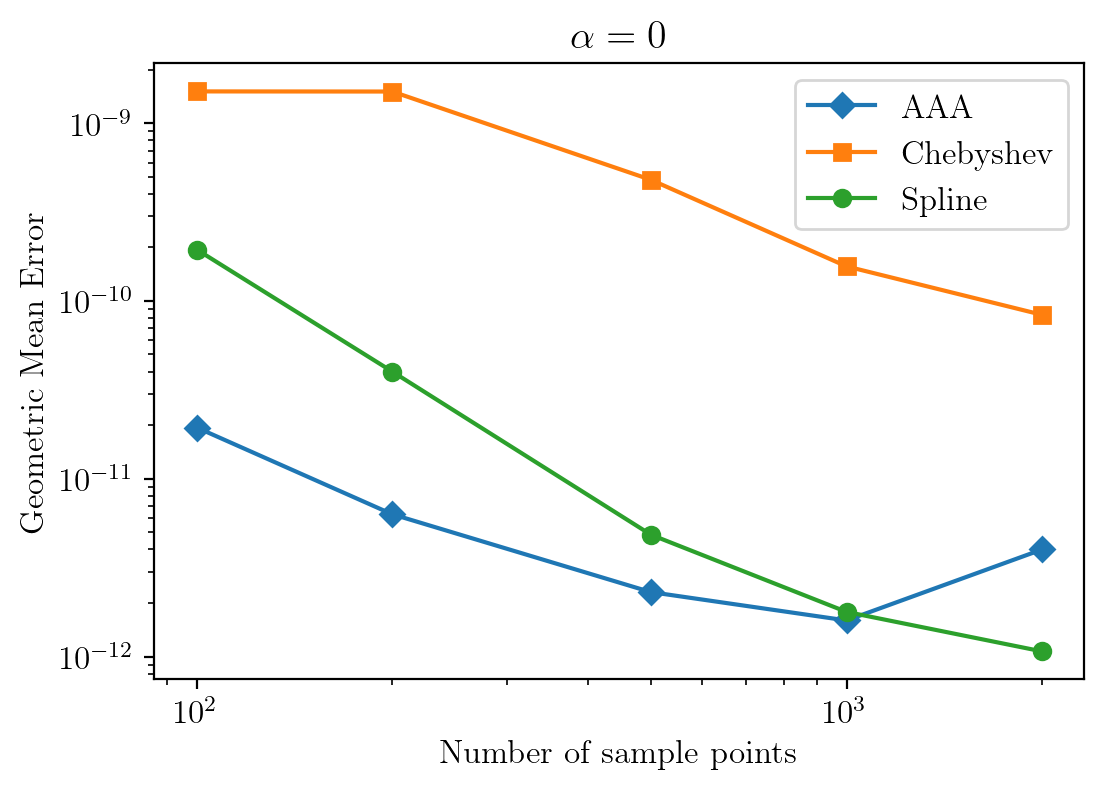

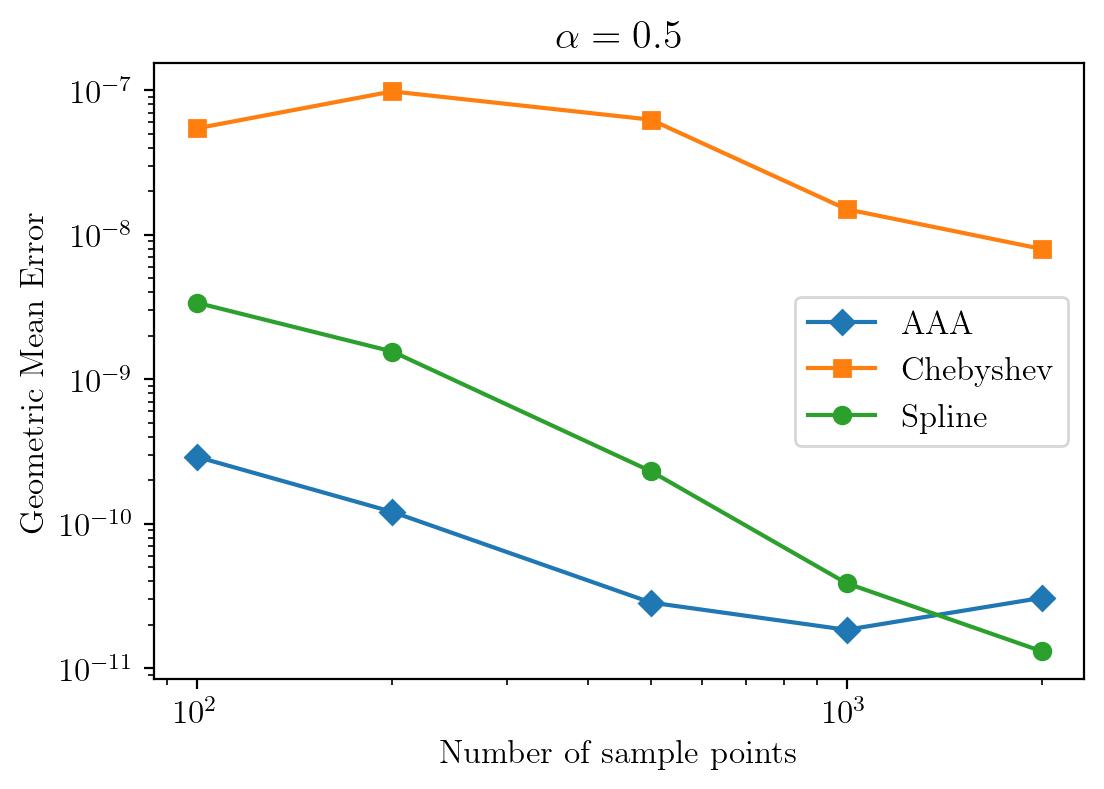

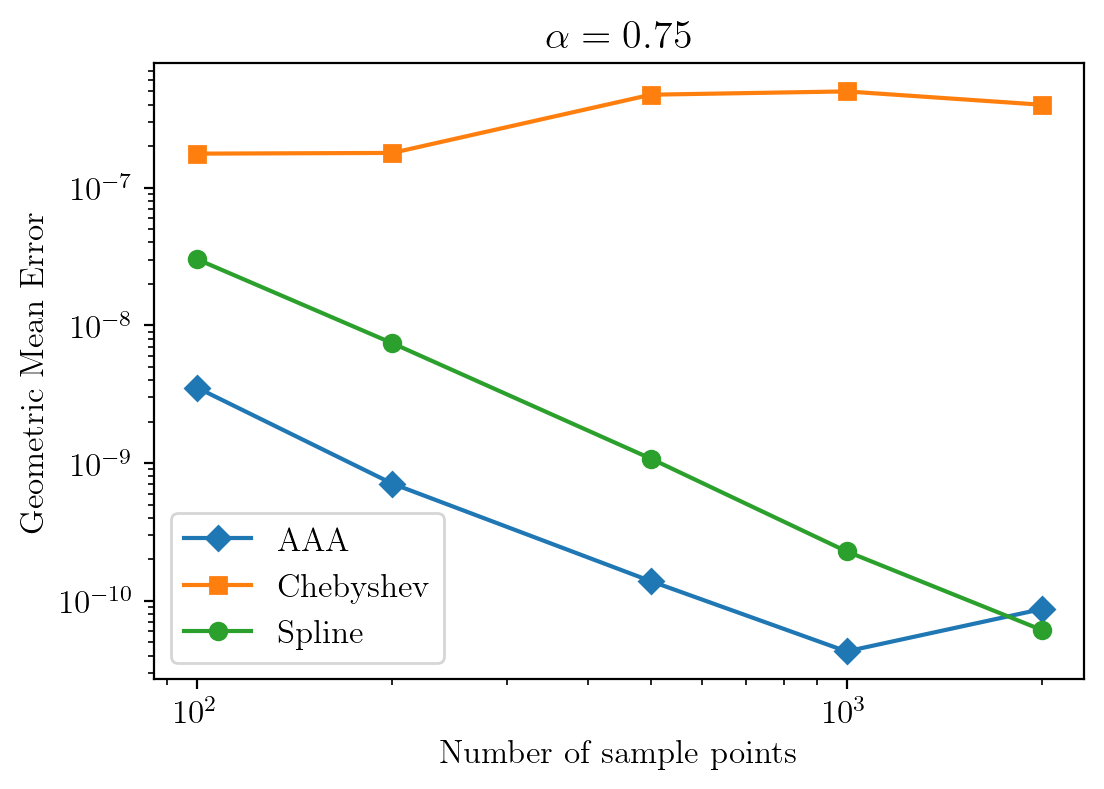

In [124]:
n_list = [100, 200, 500, 1000, 2000]
plt.figure(figsize=(6, 4))
plt.plot(n_list, aaa_geom_errors_025, marker='D', label='AAA')
plt.plot(n_list, cheb_geom_errors_025, marker='s', label='Chebyshev')
plt.plot(n_list, spline_geom_errors_025, marker='o', label='Spline')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title(r'$\alpha = 0.25$')
plt.gcf().set_dpi(200)
plt.savefig('025_errors.png', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(n_list, aaa_geom_errors_0, marker='D', label='AAA')
plt.plot(n_list, cheb_geom_errors_0, marker='s', label='Chebyshev')
plt.plot(n_list, spline_geom_errors_0, marker='o', label='Spline')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title(r'$\alpha = 0$')
plt.gcf().set_dpi(200)
plt.savefig('0_errors.png', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(n_list, aaa_geom_errors_05, marker='D', label='AAA')
plt.plot(n_list, cheb_geom_errors_05, marker='s', label='Chebyshev')
plt.plot(n_list, spline_geom_errors_05, marker='o', label='Spline')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title(r'$\alpha = 0.5$')
plt.gcf().set_dpi(200)
plt.savefig('05_errors.png', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(n_list, aaa_geom_errors_075, marker='D', label='AAA')
plt.plot(n_list, cheb_geom_errors_075, marker='s', label='Chebyshev')
plt.plot(n_list, spline_geom_errors_075, marker='o', label='Spline')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title(r'$\alpha = 0.75$')
plt.gcf().set_dpi(200)
plt.savefig('075_errors.png', bbox_inches='tight')


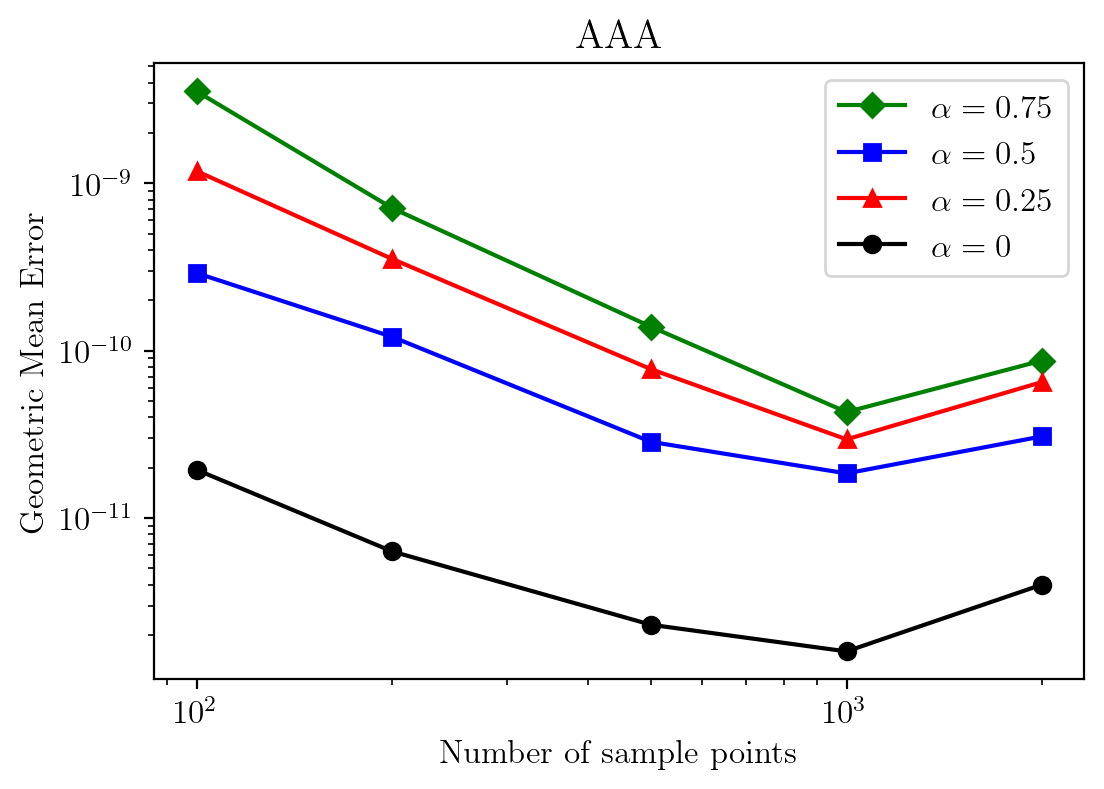

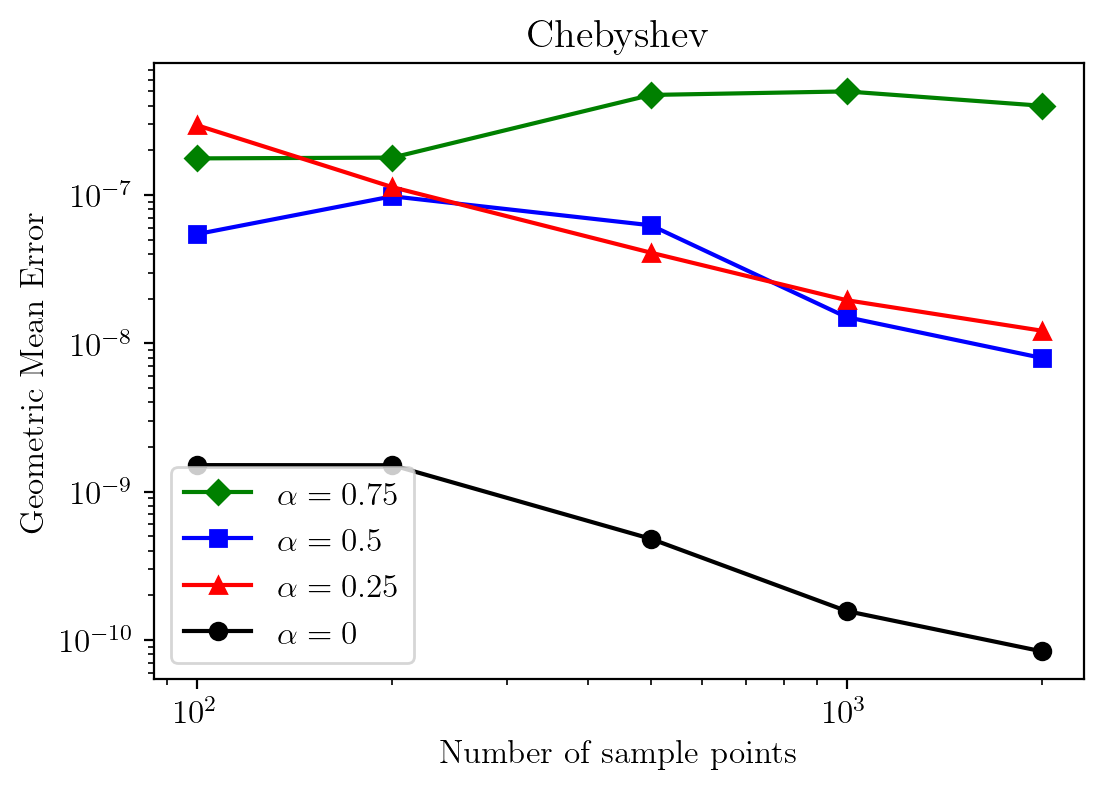

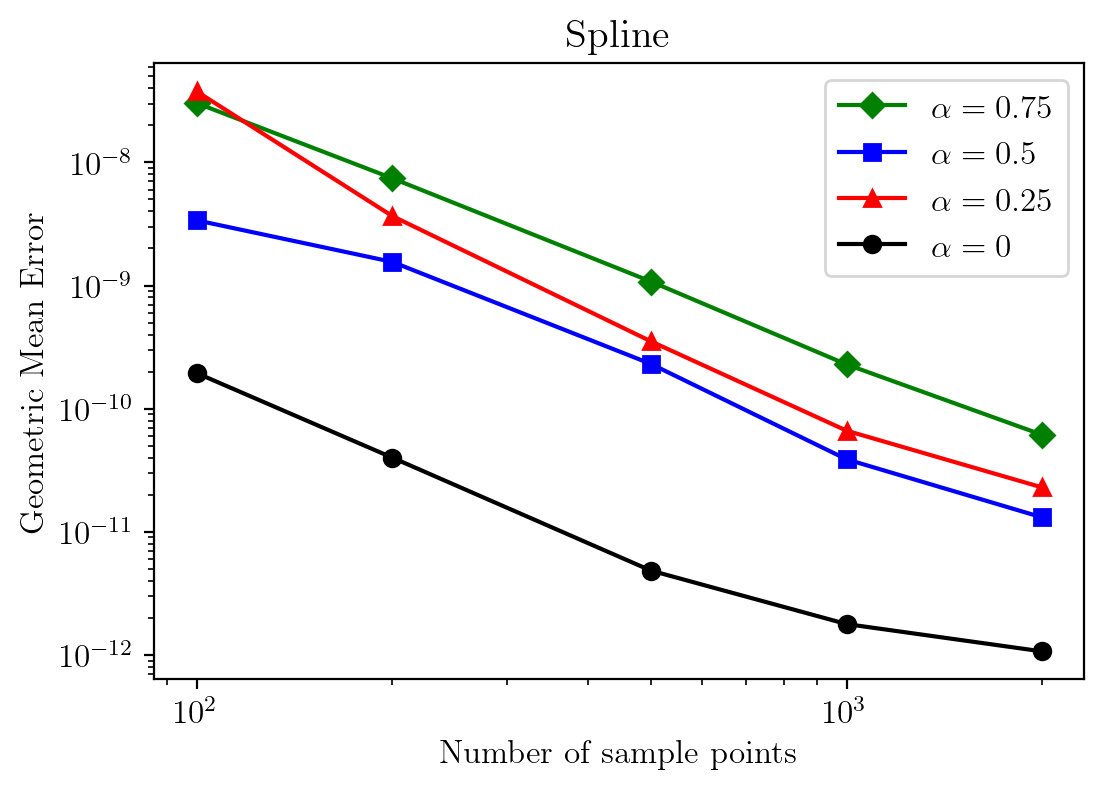

In [125]:
n_list = [100, 200, 500, 1000, 2000]

plt.figure(figsize=(6, 4))
plt.plot(n_list, aaa_geom_errors_075, marker='D', label=r'$\alpha=0.75$', color='green')
plt.plot(n_list, aaa_geom_errors_05, marker='s', label=r'$\alpha=0.5$', color='blue')
plt.plot(n_list, aaa_geom_errors_025, marker='^', label=r'$\alpha=0.25$', color='red')
plt.plot(n_list, aaa_geom_errors_0, marker='o', label=r'$\alpha=0$', color='black')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title('AAA')
plt.gcf().set_dpi(200)
plt.savefig('aaa_mean_errors.png', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(n_list, cheb_geom_errors_075, marker='D', label=r'$\alpha=0.75$', color='green')
plt.plot(n_list, cheb_geom_errors_05, marker='s', label=r'$\alpha=0.5$', color='blue')
plt.plot(n_list, cheb_geom_errors_025, marker='^', label=r'$\alpha=0.25$', color='red')
plt.plot(n_list, cheb_geom_errors_0, marker='o', label=r'$\alpha=0$', color='black')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title('Chebyshev')
plt.gcf().set_dpi(200)
plt.savefig('cheb_mean_errors.png', bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.plot(n_list, spline_geom_errors_075, marker='D', label=r'$\alpha=0.75$', color='green')
plt.plot(n_list, spline_geom_errors_05, marker='s', label=r'$\alpha=0.5$', color='blue');
plt.plot(n_list, spline_geom_errors_025, marker='^', label=r'$\alpha=0.25$', color='red');
plt.plot(n_list, spline_geom_errors_0, marker='o', label=r'$\alpha=0$', color='black');
plt.yscale('log');
plt.xscale('log');
plt.legend()
plt.xlabel('Number of sample points')
plt.ylabel('Geometric Mean Error')
plt.title('Spline')
plt.gcf().set_dpi(200)
plt.savefig('spline_mean_errors.png', bbox_inches='tight')